In [1]:
import numpy as np
import matplotlib.pyplot as plt

  # entrenar el modelo usando descomposición QR
def entrenar_regresion_qr(X, y):
    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    Q, R = np.linalg.qr(X_b)
    beta = np.linalg.inv(R) @ Q.T @ y
    return beta

  # hacer predicciones con el modelo entrenado
def predecir(X_nuevo, beta):
    X_nuevo_b = np.hstack([np.ones((X_nuevo.shape[0], 1)), X_nuevo])
    return X_nuevo_b @ beta

  # graficar resultados
def graficar_resultado(X, y, beta, titulo, xlabel, ylabel, color_datos='blue', color_modelo='red'):
    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    y_pred = X_b @ beta

    plt.figure()
    plt.scatter(X, y, label="Datos reales", color=color_datos)
    plt.plot(X, y_pred, label="Regresión (QR)", color=color_modelo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()

In [2]:
# ----------------------------
# Salario por experiencia
# ----------------------------
data_salario = np.array([
    [1, 35],
    [2, 37],
    [3, 40],
    [4, 46],
    [5, 48],
    [6, 52],
    [7, 56],
    [8, 60],
    [9, 65],
    [10, 70]
])
data_salario

array([[ 1, 35],
       [ 2, 37],
       [ 3, 40],
       [ 4, 46],
       [ 5, 48],
       [ 6, 52],
       [ 7, 56],
       [ 8, 60],
       [ 9, 65],
       [10, 70]])

In [3]:
X1 = data_salario[:, 0].reshape(-1, 1)  # experiencia
y1 = data_salario[:, 1].reshape(-1, 1)  # salario
X1,y1

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([[35],
        [37],
        [40],
        [46],
        [48],
        [52],
        [56],
        [60],
        [65],
        [70]]))

In [4]:
modelo1 = entrenar_regresion_qr(X1, y1)
print(f"Modelo: salario = {modelo1[0,0]:.2f} + {modelo1[1,0]:.2f} * experiencia")

Modelo: salario = 29.40 + 3.91 * experiencia


In [5]:
# Predicciones
nueva_exp = np.array([[12], [15]])
salarios_estimados = predecir(nueva_exp, modelo1)
salarios_estimados

array([[76.30909091],
       [88.03636364]])

Años de experiencia: 12 → Salario estimado: $76.31K
Años de experiencia: 15 → Salario estimado: $88.04K


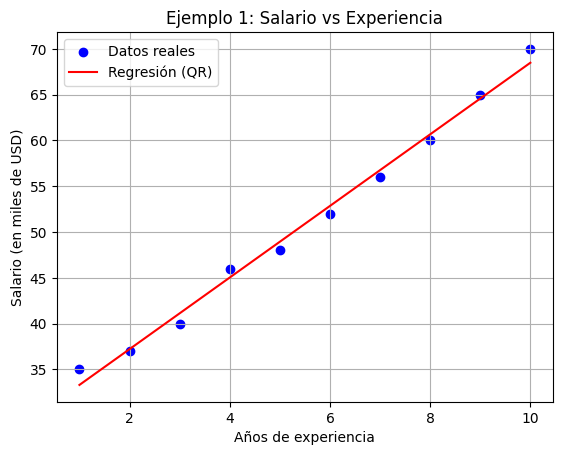

In [6]:
for exp, sal in zip(nueva_exp.flatten(), salarios_estimados.flatten()):
    print(f"Años de experiencia: {exp} → Salario estimado: ${sal:.2f}K")

# Gráfica
graficar_resultado(X1, y1, modelo1, 
                   titulo="Ejemplo 1: Salario vs Experiencia", 
                   xlabel="Años de experiencia", 
                   ylabel="Salario (en miles de USD)")



--- EJEMPLO 2: Precio de casas según tamaño ---
Modelo: precio = 8.93 + 1.57 * tamaño_m2
Tamaño: 130 m² → Precio estimado: $213.21K
Tamaño: 150 m² → Precio estimado: $244.64K


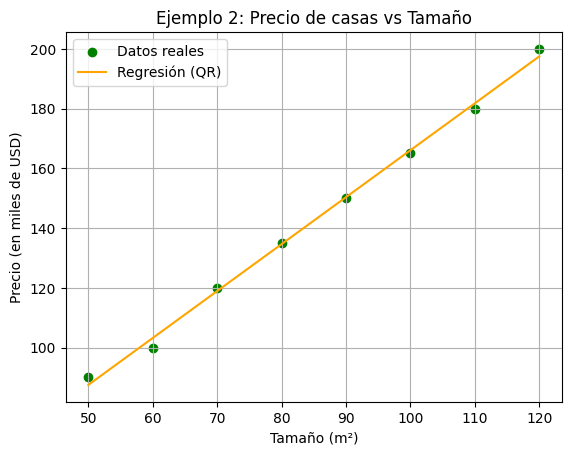

In [7]:
# ----------------------------
# EJEMPLO 2: Precio de casas por tamaño
# ----------------------------
print("\n--- EJEMPLO 2: Precio de casas según tamaño ---")

data_casas = np.array([
    [50, 90],
    [60, 100],
    [70, 120],
    [80, 135],
    [90, 150],
    [100, 165],
    [110, 180],
    [120, 200]
])

X2 = data_casas[:, 0].reshape(-1, 1)  # tamaño
y2 = data_casas[:, 1].reshape(-1, 1)  # precio

modelo2 = entrenar_regresion_qr(X2, y2)
print(f"Modelo: precio = {modelo2[0,0]:.2f} + {modelo2[1,0]:.2f} * tamaño_m2")

# Predicciones
nuevas_casas = np.array([[130], [150]])
precios_estimados = predecir(nuevas_casas, modelo2)

for tam, precio in zip(nuevas_casas.flatten(), precios_estimados.flatten()):
    print(f"Tamaño: {tam} m² → Precio estimado: ${precio:.2f}K")

# Gráfica
graficar_resultado(X2, y2, modelo2, 
                   titulo="Ejemplo 2: Precio de casas vs Tamaño", 
                   xlabel="Tamaño (m²)", 
                   ylabel="Precio (en miles de USD)", 
                   color_datos='green', 
                   color_modelo='orange')